# Kaggle Bike Predictions Project

### Notes -
#### 1. Predicted variable (Demand) is not normally distributed
#### 2 Features - Weekday, year, workingday, atemp, windspeed
#### 3 High Autocorrelation for the 'cnt' [demand] feature


In [32]:
#Import Immediate Library Needs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Find and set filepath
os.getcwd()
os.chdir('C:\\Users\\John Lang\\Desktop')
# READ THE DATA
bikes = pd.read_csv('hour.csv')

bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
# prelim analysis
bikes_prep = bikes.copy()
bikes_prep = bikes.drop(['dteday', 'casual', 'registered'], axis = 1)

bikes_prep.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

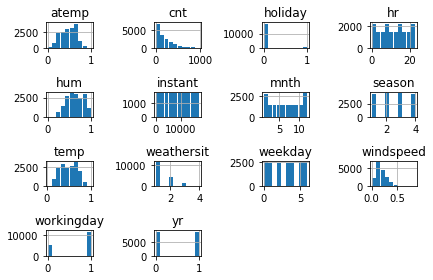

In [34]:
# histogram

bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

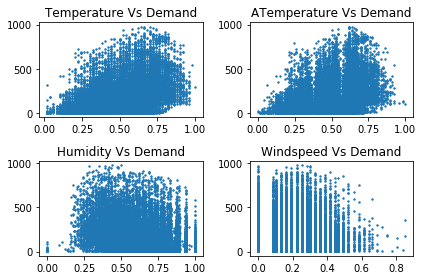

In [36]:
# Visuals
plt.subplot(2, 2, 1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['cnt'], s=2)

plt.subplot(2, 2, 2)
plt.title('ATemperature Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['cnt'], s=2)

plt.subplot(2, 2, 3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['hum'], bikes_prep['cnt'], s=2)

plt.subplot(2, 2, 4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['cnt'], s=2)

plt.tight_layout()

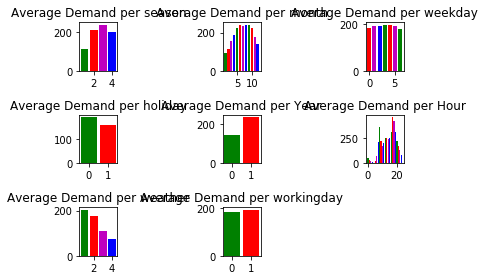

In [14]:
# VISUALIZING CATEGORICAL VARIABLES
colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Average Demand per season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['mnth'].unique()
cat_average = bikes_prep.groupby('mnth').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,3)
plt.title('Average Demand per weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,4)
plt.title('Average Demand per holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['yr'].unique()
cat_average = bikes_prep.groupby('yr').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,6)
plt.title('Average Demand per Hour')
cat_list = bikes_prep['hr'].unique()
cat_average = bikes_prep.groupby('hr').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,7)
plt.title('Average Demand per weather')
cat_list = bikes_prep['weathersit'].unique()
cat_average = bikes_prep.groupby('weathersit').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,8)
plt.title('Average Demand per workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['cnt']
plt.bar(cat_list, cat_average, color = colors)

plt.tight_layout()

In [40]:
# DROP IRRELEVANT FEATURES
#Check outliers
bikes_prep['cnt'].describe()
bikes_prep['cnt'].quantile([.05, 0.1, 0.15, 0.9, 0.95, 0.99])

#Linearity using correlation coefficient matrix
correlation = bikes_prep[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
correlation

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


#### Noticeable correlation with 'atemp' and 'temp', dropping 'atemp'
#### Dropping windspeed as there is no correlation

In [41]:
bikes_prep = bikes_prep.drop(['weekday', 'yr', 'workingday', 'atemp', 'windspeed'], axis=1)

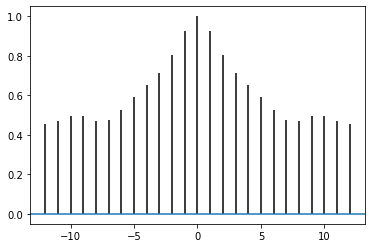

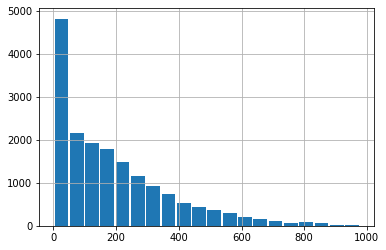

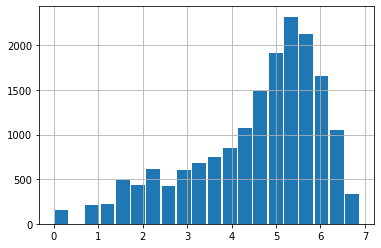

In [42]:
#Autocorrelation Demand
df1 = pd.to_numeric(bikes_prep['cnt'], downcast='float')
plt.acorr(df1, maxlags=12)

dfi = bikes_prep['cnt']
df2 = np.log(dfi)

plt.figure()
dfi.hist(rwidth=0.9, bins=20)


plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['cnt']=df2
bikes_prep_log = bikes_prep

In [60]:
# bikes_prep_log['cnt'] = str(bikes_prep_log['cnt'])
t_1 = bikes_prep['cnt'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['cnt'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['cnt'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis = 1)

bikes_prep_lag = bikes_prep_lag.dropna()

# Little Visual
bikes_prep_lag.head()

,instant,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t-1,t-2,t-3
3,4,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,5,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,6,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,7,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,8,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [61]:
#CREATE DUMMY VARIABLES
bikes_prep_lag.dtypes
bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['season']=bikes_prep_lag['weathersit'].astype('category')
bikes_prep_lag['month']=bikes_prep_lag['mnth'].astype('category')
bikes_prep_lag['hr']=bikes_prep_lag['hr'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first = True)

In [62]:
bikes_prep_lag

,instant,mnth,weathersit,temp,hum,cnt,t-1,t-2,t-3,season_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
3,4,1,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736,1,...,0,0,0,0,0,0,0,0,0,0
6,7,1,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976,1,...,0,0,0,0,0,0,0,0,0,1
17375,17376,12,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866,1,...,0,0,0,0,0,0,0,0,0,1
17376,17377,12,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,...,0,0,0,0,0,0,0,0,0,1
17377,17378,12,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
#TRAIN TEST SPLIT
Y = bikes_prep_lag[['cnt']]
X = bikes_prep_lag.drop(['cnt'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [64]:
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test) 

# Create Predictions

In [77]:
#Create Y predictions
Y_predict = std_reg.predict(X_test)

#RMSE
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [78]:
# calculating rmsle
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
    
log_sq_sum = 0.0
    
for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a) ** 2
    log_sq_sum = log_sq_sum + log_diff
       
rmsle = math.sqrt(log_sq_sum / len(Y_test))
print(rmsle)

0.3414617530379566


### RMSLE as 0.34

In [76]:
model = std_reg.fit(X_train, Y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)